<a href="https://colab.research.google.com/github/piyushchouhan/Machine-Learning-Coursera/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-01-08 10:31:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-01-08 10:31:44 (1.93 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#select some of the features class
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.tail(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1057,2.5,5,10.1,232
1058,3.0,6,11.5,264
1059,3.2,6,10.2,235
1060,3.0,6,11.5,264
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


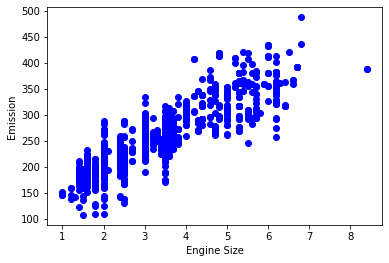

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
#training and testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [ ]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.72839746 -1.8648576 ]]
Intercept:  [103.70426623]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

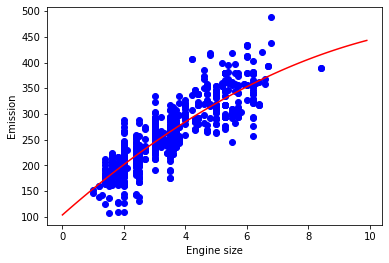

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.45
Residual sum of squares (MSE): 896.53
R2-score: 0.78


In [ ]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
train_x_poly3

array([[ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [ ]:
clf3 = linear_model.LinearRegression()
train_y3 = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

Coefficients:  [[ 0.         35.03331417  2.97099081 -0.3977188 ]]
Intercept:  [122.64138155]


Text(0, 0.5, 'Emission')

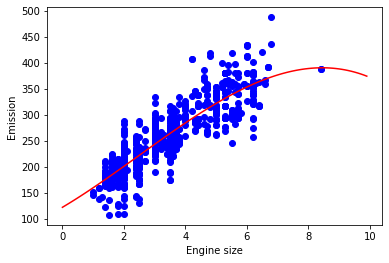

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:

test_x_poly3 = poly.fit_transform(test_x)
test_y3 = clf.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3- test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3 ) )

Mean absolute error: 22.45
Residual sum of squares (MSE): 896.53
R2-score: 0.78
